In [ ]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! gdown --id 1E3IN6o43cXjK7UsXfphT74W8PuKhQzPA

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1E3IN6o43cXjK7UsXfphT74W8PuKhQzPA
To: /content/202207-citbike-tripdata.csv
100% 661M/661M [00:02<00:00, 295MB/s]


In [ ]:
bike_data = pd.read_csv("202207-citbike-tripdata.csv", low_memory=False)

In [ ]:
# change the data type of "started_at" and "ended_at" to datetime data type.
bike_data["started_at"] = pd.to_datetime(bike_data["started_at"])
bike_data["ended_at"] = pd.to_datetime(bike_data["ended_at"])

In [ ]:
# find the difference (i.e. the total duration of each ride) between "ended_at" and "started_at."
bike_data["tripduration"] = bike_data["ended_at"] - bike_data["started_at"]

# update the unit of the "tripduration" in terms of a number of minute(s).
bike_data["tripduration"] = bike_data["tripduration"] / np.timedelta64(1, 'm')

# filter by eliminating the rides that last more than 3 hours and that has a NaN/negative unit. 
clean_bike_data = bike_data.loc[(bike_data["tripduration"] <= 180.0) & (bike_data["tripduration"] > 0.0)]

data_removed = len(bike_data) - len(clean_bike_data)
print("There were " + str(data_removed) + " data points removed from the original dataset.")

There were 13551 data points removed from the original dataset.


# Warm-up Questions

**#1. Using the start time and end time, compute the duration of each ride in minutes and plot the histogram of ride durations.**

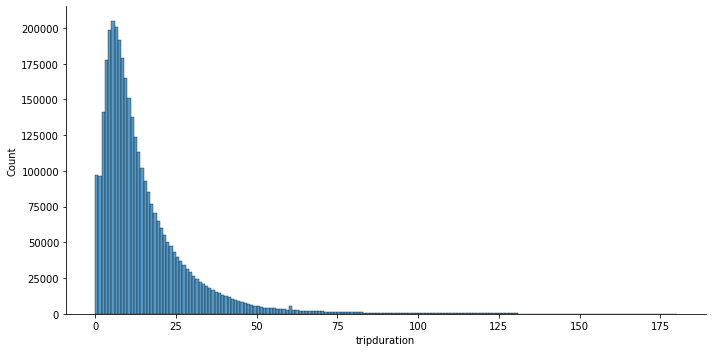

In [ ]:
# histogram of ride durations
sns.displot(data=clean_bike_data, x="tripduration", bins=range(0,181), aspect=10/5)

In [ ]:
# number of ride per minute (bewteen x and x+1 minutes)
ride_count_data = np.histogram(clean_bike_data["tripduration"], range(181)) 
ride_count_data

(array([ 97339,  96601, 141489, 177749, 198254, 204873, 201043, 191794,
        179266, 164797, 150863, 137516, 124029, 112969, 102247,  93221,
         85267,  77081,  70740,  64727,  59800,  54861,  50340,  47099,
         43088,  40030,  37190,  34418,  31419,  29317,  26635,  24592,
         22456,  20925,  19282,  17999,  16400,  15080,  14228,  13196,
         12298,  11450,  10523,   9967,   8983,   8224,   7372,   6589,
          6020,   5591,   5178,   4781,   4314,   4266,   3946,   3741,
          3487,   3367,   3172,   2964,   5408,   2513,   2337,   2288,
          2066,   2094,   2007,   1786,   1799,   1691,   1642,   1492,
          1508,   1405,   1363,   1197,   1181,   1136,   1138,   1027,
          1040,   1018,    957,    906,    890,    857,    820,    754,
           769,    734,    609,    669,    649,    621,    588,    527,
           559,    520,    502,    487,    511,    478,    440,    456,
           457,    409,    384,    382,    401,    352,    348, 

**#2. What is the expected ride duration (i.e., the average ride duration)? What is the empirical variance of ride duration? What is the probability that a ride duration is greater than 20 min?**

In [ ]:
print(clean_bike_data["tripduration"].describe())

count    3.483839e+06
mean     1.499739e+01
std      1.525892e+01
min      1.666667e-02
25%      5.766667e+00
50%      1.056667e+01
75%      1.908333e+01
max      1.800000e+02
Name: tripduration, dtype: float64


In [ ]:
numerator = clean_bike_data.loc[(clean_bike_data["tripduration"] > 20.0)]
probability = len(numerator) / len(clean_bike_data)
print(probability)

0.23277711742706825


* The expected ride duration is approximately 14.9974 minutes.

* The empirical variance of ride duration is the square of the standard deviation = pow(15.25892, 2) = approximately 232.8346.

* The probability that a ride duration is greater than 20 minutes is approximately 0.2328

**#3. What is the probability that a ride duration is greater than 20 min conditioning on the fact that the user is a CitiBike member? Note that the last column gives whether the ride is for a casual client or a CitiBike member.**

In [ ]:
# P(A|B) = P(A,B) / P(B)

member_data = clean_bike_data.loc[clean_bike_data["member_casual"] == 'member']
casual_data = clean_bike_data.loc[clean_bike_data["member_casual"] == 'casual']

# selecting only those whose ride duration is greater than 20 minutes and the user(s) is a CitiBike member.
member_g20_data = clean_bike_data.loc[(clean_bike_data["member_casual"] == 'member') & (clean_bike_data["tripduration"] > 20.0)]

# the total population of this dataset = 3,483,839
A = float(493929 / 3483839)
B = float(2653497 / 3483839)

print(A / B)

0.18614266381307384


* The probability that a ride duration is greater than 20 minutes, given that the user is a CitiBike member is a quotient of A and B. It is approximately 493,929 / 2,653,497 = 0.1861 

**#4. Suppose that the duration of some ride is more than 25min. What is the probability that this ride belongs to a CitiBike member?**

In [ ]:
#The probability that the ride is from a CitiBike member, given that the duration of the ride is more than 25 minutes.
member_g25_data = clean_bike_data.loc[(clean_bike_data["member_casual"] == 'member') & (clean_bike_data["tripduration"] > 25.0)]
g25_data = clean_bike_data.loc[bike_data["tripduration"] > 25.0]
print(len(member_g25_data)/len(g25_data))


0.5839272451304628


* The probability that the ride belongs to a CitiBike member, given that the duration of its ride is more than 25 minutes, is a quotient of X and Y. It is approximately 324,698 / 2,653,497 = 0.1224 

**#5. What is the expected ride duration of an electric bike? What is the expected ride duration of a classic bike?**

In [ ]:
classic_type = clean_bike_data.loc[(clean_bike_data["rideable_type"] == 'classic_bike')]
electric_type = clean_bike_data.loc[(clean_bike_data["rideable_type"] == 'electric_bike')]
print(classic_type["tripduration"].describe())
print(electric_type["tripduration"].describe())

count    2.622092e+06
mean     1.473530e+01
std      1.476746e+01
min      1.666667e-02
25%      5.716667e+00
50%      1.040000e+01
75%      1.878333e+01
max      1.800000e+02
Name: tripduration, dtype: float64
count    824791.000000
mean         15.173653
std          15.818250
min           0.016667
25%           5.783333
50%          10.716667
75%          19.100000
max         179.950000
Name: tripduration, dtype: float64


* The expected ride duration of an electric bike is approximately 15.1737 minutes.

* The expected ride duration of a classic bike is approximately 14.7353 minutes.

**#6. Suppose that the duration of some ride is less than 10min. What is the probability that this ride uses an electric bike? What is the probability that this ride uses a classic bike? Comment on the results.**

In [ ]:
electric_data = clean_bike_data.loc[(clean_bike_data["rideable_type"] == 'electric_bike') & (clean_bike_data["tripduration"] < 10.0)]
classic_data = clean_bike_data.loc[(clean_bike_data["rideable_type"] == 'classic_bike') & (clean_bike_data["tripduration"] < 10.0)]
ten_min_data = clean_bike_data.loc[(clean_bike_data["tripduration"] < 10.0)]

prob_electric = len(electric_data) / len(ten_min_data) 
prob_classic = len(classic_data) / len(ten_min_data)

print(prob_electric)
print(prob_classic)

0.2338137133628316
0.7634534132185664


* The probability that this ride uses an electric bike is approximately 0.2338

* The probability that this ride uses a classic bike is approximately 0.7635

* Based on the Citi Bike data reflecting the activities of Citi Bike in July 2022, more people rode classic bikes than electric bikes. This was expected knowing that there are more classic bikes available in NYC than electric bikes. The electric bikes have been recently launched and distributed since August 2018. Furthermore, Citi electric bikes come with an extra 15 cents per minute charge which might have affected riders' decisions to choose the cheaper option.

# Project Analysis

In [ ]:
clean_bike_data["start_station_name"].value_counts()

West St & Chambers St       15824
W 21 St & 6 Ave             13490
Broadway & W 58 St          12741
Broadway & E 14 St          12638
6 Ave & W 33 St             12596
                            ...  
Morgan WH station              17
Morgan Loading Docks           15
Nassau St\t& Duffield St       14
54 St & 37 Ave                 10
Lab - NYC                       2
Name: start_station_name, Length: 1583, dtype: int64

* The three NYC CitiBike stations (the capacity of each bike station) we decided to work with are the following:

1.   West St & Chambers St (77)
2.   W 21 St & 6 Ave (74)
3.   Broadway & W 58 St (76)

* We splitted the day into two blocks of time, morning and evening, into the following:

1.   Morning: 05:00 - 10:00
2.   Evening: 17:00 - 22:00

In [ ]:
# focusing only on weekday data
weekday_bike_data = bike_data.loc[(bike_data["started_at"].dt.weekday < 5) & (bike_data["ended_at"].dt.weekday < 5)]

# filter: block of time for morning, 5AM to 10AM
weekday_morning_s = weekday_bike_data.loc[(weekday_bike_data["started_at"].dt.hour >= 5) & (weekday_bike_data["started_at"].dt.hour <= 9)]
weekday_morning_e = weekday_bike_data.loc[(weekday_bike_data["ended_at"].dt.hour >= 5) & (weekday_bike_data["ended_at"].dt.hour <= 9)]

# filter: block of time for evening, 5PM to 10PM
weekday_evening_s = weekday_bike_data.loc[(weekday_bike_data["started_at"].dt.hour >= 17) & (weekday_bike_data["started_at"].dt.hour <= 21)] 
weekday_evening_e = weekday_bike_data.loc[(weekday_bike_data["ended_at"].dt.hour >= 17) & (weekday_bike_data["ended_at"].dt.hour <= 21)] 

In [ ]:
# filter: morning and evening, start and end, street = "West St & Chambers St"
s1_start = weekday_morning_s.loc[(weekday_morning_s["start_station_name"] == "West St & Chambers St")]
s1_end = weekday_morning_e.loc[(weekday_morning_e["end_station_name"] == "West St & Chambers St")]
s1_start_e = weekday_evening_s.loc[(weekday_evening_s["start_station_name"] == "West St & Chambers St")]
s1_end_e = weekday_evening_e.loc[(weekday_evening_e["end_station_name"] == "West St & Chambers St")]

# filter: morning and evening, start and end, street = "W 21 St & 6 Ave"
s2_start = weekday_morning_s.loc[(weekday_morning_s["start_station_name"] == "W 21 St & 6 Ave")]
s2_end = weekday_morning_e.loc[(weekday_morning_e["end_station_name"] == "W 21 St & 6 Ave")]
s2_start_e = weekday_evening_s.loc[(weekday_evening_s["start_station_name"] == "W 21 St & 6 Ave")]
s2_end_e = weekday_evening_e.loc[(weekday_evening_e["end_station_name"] == "W 21 St & 6 Ave")]

# filter: morning and evening, start and end, street = "Broadway & W 58 St"
s3_start = weekday_morning_s.loc[(weekday_morning_s["start_station_name"] == "Broadway & W 58 St")]
s3_end = weekday_morning_e.loc[(weekday_morning_e["end_station_name"] == "Broadway & W 58 St")]
s3_start_e = weekday_evening_s.loc[(weekday_evening_s["start_station_name"] == "Broadway & W 58 St")]
s3_end_e = weekday_evening_e.loc[(weekday_evening_e["end_station_name"] == "Broadway & W 58 St")]

* We discretized each block in periods of 3 minutes (i.e. the difference between two consecutive time steps = 3 minutes) to reflect as many riding experiences (incoming/outgoing) as possible as the three stations are one of the most popular stations in New York City.

In [ ]:
# morning date range (start and end periods are not necessarily 5AM and 10AM; missing data points)
date_r = pd.date_range(start='2022-07-01 05:00:00', end='2022-07-29 09:54:00', freq = '3min')
date_r2 = pd.date_range(start='2022-07-01 05:00:00', end='2022-07-29 09:45:00', freq = '3min')
date_r3 = pd.date_range(start='2022-07-01 05:00:00', end='2022-07-29 09:57:00', freq = '3min')
date_r4 = pd.date_range(start='2022-07-01 05:24:00', end='2022-07-29 09:45:00', freq = '3min')

# evening date range (start and end periods are not necessarily 5PM and 10PM; missing data points)
date_e = pd.date_range(start='2022-07-01 17:00:00', end='2022-07-29 21:54:00', freq = '3min')
date_e2 = pd.date_range(start='2022-07-01 17:00:00', end='2022-07-29 21:45:00', freq = '3min')
date_e3 = pd.date_range(start='2022-07-01 17:00:00', end='2022-07-29 21:51:00', freq = '3min')
date_e4 = pd.date_range(start='2022-07-01 17:24:00', end='2022-07-29 21:45:00', freq = '3min')

Morning Datasets

(station 1 (s1), station 2 (s2), station 3 (s3))

In [ ]:
s1_start['count'] = 1
s1_start = s1_start.set_index('started_at').resample('3min').sum()
s1_start = s1_start.reset_index(drop=True)
s1_start["started_at"] = date_r
s1_start["week"] = s1_start["started_at"].dt.weekday
s1_start["hr_temp"] = s1_start["started_at"].dt.hour
index_hr_s = s1_start[(s1_start['hr_temp'] < 5)].index # drop the rows whose hour is less than 5 
s1_start.drop(index_hr_s, inplace=True)
index_hr_s2 = s1_start[(s1_start['hr_temp'] > 9)].index # drop the rows whose hour is greater than 9
s1_start.drop(index_hr_s2, inplace=True)
index_hr_s3 = s1_start[(s1_start['week'] > 4)].index # drop the rows for saturday and sunday (week = 5, 6)
s1_start.drop(index_hr_s3, inplace=True)

s1_end['count'] = 1
s1_end = s1_end.set_index("ended_at").resample('3min').sum()
s1_end = s1_end.reset_index(drop=True)
s1_end["ended_at"] = date_r2
s1_end["week"] = s1_end["ended_at"].dt.weekday
s1_end["hr_temp"] = s1_end["ended_at"].dt.hour
index_hr_s = s1_end[(s1_end['hr_temp'] < 5)].index # drop the rows whose hour is less than 5 
s1_end.drop(index_hr_s, inplace=True)
index_hr_s2 = s1_end[(s1_end['hr_temp'] > 9)].index # drop the rows whose hour is greater than 9
s1_end.drop(index_hr_s2, inplace=True)
index_hr_s3 = s1_end[(s1_end['week'] > 4)].index # drop the rows for saturday and sunday (week = 5, 6)
s1_end.drop(index_hr_s3, inplace=True)

In [ ]:
s2_start['count'] = 1
s2_start = s2_start.set_index('started_at').resample('3min').sum()
s2_start = s2_start.reset_index(drop=True)
s2_start["started_at"] = date_r
s2_start["week"] = s2_start["started_at"].dt.weekday
s2_start["hr_temp"] = s2_start["started_at"].dt.hour
index_hr_s = s2_start[(s2_start['hr_temp'] < 5)].index # drop the rows whose hour is less than 5 
s2_start.drop(index_hr_s, inplace=True)
index_hr_s2 = s2_start[(s2_start['hr_temp'] > 9)].index # drop the rows whose hour is greater than 9
s2_start.drop(index_hr_s2, inplace=True)
index_hr_s3 = s2_start[(s2_start['week'] > 4)].index # drop the rows for saturday and sunday (week = 5, 6)
s2_start.drop(index_hr_s3, inplace=True)

s2_end['count'] = 1
s2_end = s2_end.set_index("ended_at").resample('3min').sum()
s2_end = s2_end.reset_index(drop=True)
s2_end["ended_at"] = date_r
s2_end["week"] = s2_end["ended_at"].dt.weekday
s2_end["hr_temp"] = s2_end["ended_at"].dt.hour
index_hr_s = s2_end[(s2_end['hr_temp'] < 5)].index # drop the rows whose hour is less than 5 
s2_end.drop(index_hr_s, inplace=True)
index_hr_s2 = s2_end[(s2_end['hr_temp'] > 9)].index # drop the rows whose hour is greater than 9
s2_end.drop(index_hr_s2, inplace=True)
index_hr_s3 = s2_end[(s2_end['week'] > 4)].index # drop the rows for saturday and sunday (week = 5, 6)
s2_end.drop(index_hr_s3, inplace=True)

In [ ]:
s3_start['count'] = 1
s3_start = s3_start.set_index('started_at').resample('3min').sum()
s3_start = s3_start.reset_index(drop=True)
s3_start["started_at"] = date_r3
s3_start["week"] = s3_start["started_at"].dt.weekday
s3_start["hr_temp"] = s3_start["started_at"].dt.hour
index_hr_s = s3_start[(s3_start['hr_temp'] < 5)].index # drop the rows whose hour is less than 5 
s3_start.drop(index_hr_s, inplace=True)
index_hr_s2 = s3_start[(s3_start['hr_temp'] > 9)].index # drop the rows whose hour is greater than 9
s3_start.drop(index_hr_s2, inplace=True)
index_hr_s3 = s3_start[(s3_start['week'] > 4)].index # drop the rows for saturday and sunday (week = 5, 6)
s3_start.drop(index_hr_s3, inplace=True)

s3_end['count'] = 1
s3_end = s3_end.set_index("ended_at").resample('3min').sum()
s3_end = s3_end.reset_index(drop=True)
s3_end["ended_at"] = date_r4
s3_end["week"] = s3_end["ended_at"].dt.weekday
s3_end["hr_temp"] = s3_end["ended_at"].dt.hour
index_hr_s = s3_end[(s3_end['hr_temp'] < 5)].index # drop the rows whose hour is less than 5 
s3_end.drop(index_hr_s, inplace=True)
index_hr_s2 = s3_end[(s3_end['hr_temp'] > 9)].index # drop the rows whose hour is greater than 9
s3_end.drop(index_hr_s2, inplace=True)
index_hr_s3 = s3_end[(s3_end['week'] > 4)].index # drop the rows for saturday and sunday (week = 5, 6)
s3_end.drop(index_hr_s3, inplace=True)

Evening Datasets

(station 1 (s1_e), station 2 (s2_e), station 3 (s3_e))

In [ ]:
s1_start_e['count'] = 1
s1_start_e = s1_start_e.set_index('started_at').resample('3min').sum()
s1_start_e = s1_start_e.reset_index(drop=True)
s1_start_e["started_at"] = date_e
s1_start_e["week"] = s1_start_e["started_at"].dt.weekday
s1_start_e["hr_temp"] = s1_start_e["started_at"].dt.hour
index_hr_s = s1_start_e[(s1_start_e['hr_temp'] < 17)].index # drop the rows whose hour is less than 5 
s1_start_e.drop(index_hr_s, inplace=True)
index_hr_s2 = s1_start_e[(s1_start_e['hr_temp'] > 21)].index # drop the rows whose hour is greater than 9
s1_start_e.drop(index_hr_s2, inplace=True)
index_hr_s3 = s1_start_e[(s1_start_e['week'] > 4)].index # drop the rows for saturday and sunday (week = 5, 6)
s1_start_e.drop(index_hr_s3, inplace=True)

s1_end_e['count'] = 1
s1_end_e = s1_end_e.set_index("ended_at").resample('3min').sum()
s1_end_e = s1_end_e.reset_index(drop=True)
s1_end_e["ended_at"] = date_e2
s1_end_e["week"] = s1_end_e["ended_at"].dt.weekday
s1_end_e["hr_temp"] = s1_end_e["ended_at"].dt.hour
index_hr_s = s1_end_e[(s1_end_e['hr_temp'] < 17)].index # drop the rows whose hour is less than 5 
s1_end_e.drop(index_hr_s, inplace=True)
index_hr_s2 = s1_end_e[(s1_end_e['hr_temp'] > 21)].index # drop the rows whose hour is greater than 9
s1_end_e.drop(index_hr_s2, inplace=True)
index_hr_s3 = s1_end_e[(s1_end_e['week'] > 4)].index # drop the rows for saturday and sunday (week = 5, 6)
s1_end_e.drop(index_hr_s3, inplace=True)

In [ ]:
s2_start_e['count'] = 1
s2_start_e = s2_start_e.set_index('started_at').resample('3min').sum()
s2_start_e = s2_start_e.reset_index(drop=True)
s2_start_e["started_at"] = date_e
s2_start_e["week"] = s2_start_e["started_at"].dt.weekday
s2_start_e["hr_temp"] = s2_start_e["started_at"].dt.hour
index_hr_s = s2_start_e[(s2_start_e['hr_temp'] < 17)].index # drop the rows whose hour is less than 5 
s2_start_e.drop(index_hr_s, inplace=True)
index_hr_s2 = s2_start_e[(s2_start_e['hr_temp'] > 21)].index # drop the rows whose hour is greater than 9
s2_start_e.drop(index_hr_s2, inplace=True)
index_hr_s3 = s2_start_e[(s2_start_e['week'] > 4)].index # drop the rows for saturday and sunday (week = 5, 6)
s2_start_e.drop(index_hr_s3, inplace=True)

s2_end_e['count'] = 1
s2_end_e = s2_end_e.set_index("ended_at").resample('3min').sum()
s2_end_e = s2_end_e.reset_index(drop=True)
s2_end_e["ended_at"] = date_e3
s2_end_e["week"] = s2_end_e["ended_at"].dt.weekday
s2_end_e["hr_temp"] = s2_end_e["ended_at"].dt.hour
index_hr_s = s2_end_e[(s2_end_e['hr_temp'] < 17)].index # drop the rows whose hour is less than 5 
s2_end_e.drop(index_hr_s, inplace=True)
index_hr_s2 = s2_end_e[(s2_end_e['hr_temp'] > 21)].index # drop the rows whose hour is greater than 9
s2_end_e.drop(index_hr_s2, inplace=True)
index_hr_s3 = s2_end_e[(s2_end_e['week'] > 4)].index # drop the rows for saturday and sunday (week = 5, 6)
s2_end_e.drop(index_hr_s3, inplace=True)

In [ ]:
s3_start_e['count'] = 1
s3_start_e = s3_start_e.set_index('started_at').resample('3min').sum()
s3_start_e = s3_start_e.reset_index(drop=True)
s3_start_e["started_at"] = date_e2
s3_start_e["week"] = s3_start_e["started_at"].dt.weekday
s3_start_e["hr_temp"] = s3_start_e["started_at"].dt.hour
index_hr_s = s3_start_e[(s3_start_e['hr_temp'] < 17)].index # drop the rows whose hour is less than 5 
s3_start_e.drop(index_hr_s, inplace=True)
index_hr_s2 = s3_start_e[(s3_start_e['hr_temp'] > 21)].index # drop the rows whose hour is greater than 9
s3_start_e.drop(index_hr_s2, inplace=True)
index_hr_s3 = s3_start_e[(s3_start_e['week'] > 4)].index # drop the rows for saturday and sunday (week = 5, 6)
s3_start_e.drop(index_hr_s3, inplace=True)

s3_end_e['count'] = 1
s3_end_e = s3_end_e.set_index("ended_at").resample('3min').sum()
s3_end_e = s3_end_e.reset_index(drop=True)
s3_end_e["ended_at"] = date_e4
s3_end_e["week"] = s3_end_e["ended_at"].dt.weekday
s3_end_e["hr_temp"] = s3_end_e["ended_at"].dt.hour
index_hr_s = s3_end_e[(s3_end_e['hr_temp'] < 17)].index # drop the rows whose hour is less than 5 
s3_end_e.drop(index_hr_s, inplace=True)
index_hr_s2 = s3_end_e[(s3_end_e['hr_temp'] > 21)].index # drop the rows whose hour is greater than 9
s3_end_e.drop(index_hr_s2, inplace=True)
index_hr_s3 = s3_end_e[(s3_end_e['week'] > 4)].index # drop the rows for saturday and sunday (week = 5, 6)
s3_end_e.drop(index_hr_s3, inplace=True)

In [ ]:
def transition_matrix(transitions):
    n = 1 + max(transitions) # number of states
    M = [[0] * n for _ in range(n)]

    for (i,j) in zip(transitions,transitions[1:]):
        M[i][j] += 1

    # now convert to probabilities:
    for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]
    return M

In [ ]:
# West St & Chamber St's total capacity: 77 docks
# Morning / West St & Chamber St
list1 = s1_start["count"].to_list()
list2 = s1_end["count"].to_list()
list2.extend(3 * [0]) # filling the gap for missing data points at the end

s1_states = []
num_bikes, count = 0, 0
capacity = 52
# we assumed that the starting capacity is approximately 2/3 of the total capacity of each station.
for i in range(len(list1)):
  num_bikes = int(capacity - list1[i] + list2[i])
  s1_states.append(num_bikes)
  capacity = num_bikes
  count += 1
# placing a counter to refresh (rebalancing) the total available bikes to account for potential scenarios such as an excess/shortage of bikes. 
  if count % 95 == 0:
    capacity = 10 


# Evening / West St & Chamber St
list3 = s1_start_e["count"].to_list()
list4 = s1_end_e["count"].to_list()
list4.extend(3 * [0]) # filling the gap for missing data points at the end

s1_e_states = []
num_bikes, count = 0, 0
capacity = 65
for i in range(len(list3)):
  num_bikes = int(capacity - list3[i] + list4[i])
  s1_e_states.append(num_bikes)
  capacity = num_bikes
  count += 1
  if count % 70 == 0:
    capacity = 65

In [ ]:
west_cham_tm = transition_matrix(s1_states)
for row in west_cham_tm: print(' '.join('{0:.4f}'.format(x) for x in row))

0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000

[0.00050433 0.00050433 0.00302596 0.01008652 0.01059041 0.02774027
 0.02068476 0.03327014 0.02309334 0.02154778 0.0576434  0.04837682
 0.03700456 0.02084076 0.01601797 0.02331104 0.02136465 0.01844834
 0.01650776 0.02281929 0.01747867 0.01602211 0.01893522 0.01262347
 0.01844968 0.01747863 0.02670338 0.02184819 0.01553643 0.01650728
 0.02330437 0.01699254 0.01747768 0.01941873 0.01699062 0.01650228
 0.01795868 0.0140706  0.01163727 0.00776195 0.0053363  0.00582136
 0.00291079 0.00910873 0.01234973 0.00840931 0.01016996 0.01895026
 0.01488863 0.01147665 0.01561737 0.01564644 0.01183807 0.00910487
 0.00743331 0.00578157 0.00622655 0.00414212 0.00746509 0.00207489
 0.00207378 0.00290432 0.0033191  0.00373392 0.00456351 0.00207437
 0.00373382 0.00290408 0.00207434 0.00124461 0.         0.00041487
 0.00082974 0.00331895 0.00165947 0.00124461 0.00165947 0.00041487]


Text(0, 0.5, 'Stationary Distribution')

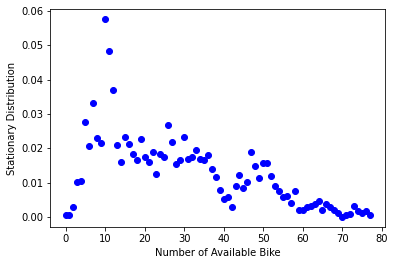

In [ ]:
init_state = [0] * 78 # [0, 0, 0, ... , 0]
init_state[0] = 1 # [1, 0, 0, ... , 0]

# set transition matrix
transition_matrix = np.array(west_cham_tm)

# set initial distribution
initial_dist = np.array(init_state)

# simulate 5000 time steps
for _ in range(5000):
    update = initial_dist @ transition_matrix
    initial_dist = update
    
print(initial_dist)

x_axis = list(range(0,78))
plt.plot(x_axis, initial_dist, 'bo')
plt.xlabel('Number of Available Bike')
plt.ylabel('Stationary Distribution')

The stationary distribution has a maximum value at the capacity which we reset to after a certain number of counting (in this case, at 95). In the morning at West St & Chamber St's CitiBike station, a number of available bikes are mostly between 5 and 35 and this is likely expected because we are "rebalancing" our capacity of the station to 10 after a certain number of counts. However, the fact that the sum of stationary distribution for *higher* number of available bikes (i.e. from 35 to 77 bikes) than *lower* number of available bikes implies that this station receives more incoming bikes from other stations ("ended_at") than yields more outgoing bikes ("started_at").
Around the end of the morning, we expect there are approximately 25 to 30 bikes at this station.

In [ ]:
def transition_matrix(transitions):
    n = 1 + max(transitions) # number of states
    M = [[0] * n for _ in range(n)]

    for (i,j) in zip(transitions,transitions[1:]):
        M[i][j] += 1

    # now convert to probabilities:
    for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]
    return M

In [ ]:
west_cham_e_tm = transition_matrix(s1_e_states)
for row in west_cham_e_tm: print(' '.join('{0:.4f}'.format(x) for x in row))

0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000

[0.00048316 0.00048316 0.00338212 0.00289896 0.00096632 0.00338212
 0.00338212 0.00096632 0.00096632 0.00144948 0.00144948 0.00096632
 0.         0.00144948 0.00048316 0.00096632 0.00289896 0.0024158
 0.00338212 0.0048316  0.00289896 0.00386528 0.00144948 0.0024158
 0.00144948 0.00048316 0.00193264 0.00289896 0.00338212 0.00048316
 0.00144948 0.00289896 0.00434844 0.00096632 0.00338212 0.00338212
 0.00434844 0.00193264 0.00289896 0.00434843 0.00531476 0.00724746
 0.01014636 0.01062952 0.0120792  0.01256237 0.02077537 0.02029273
 0.01835914 0.02077424 0.02223446 0.03380315 0.03235679 0.02511658
 0.03426816 0.04690965 0.04579176 0.0413147  0.02870944 0.04347742
 0.03712756 0.03182147 0.03841706 0.04531131 0.0447143  0.04278205
 0.03237553 0.02974196 0.02923134 0.0273275  0.01897621 0.01295383
 0.00877486 0.00738239 0.00462338 0.00230984 0.00323624 0.0023116 ]


Text(0, 0.5, 'Stationary Distribution')

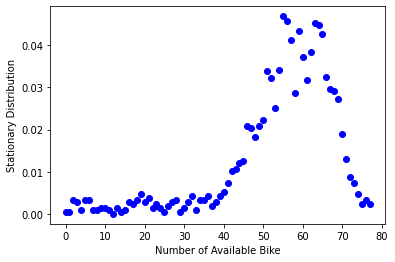

In [ ]:
init_state = [0] * 78 # [0, 0, 0, ... , 0]
init_state[0] = 1 # [1, 0, 0, ... , 0]

# set transition matrix
transition_matrix =  np.array(west_cham_e_tm)

# set initial distribution
initial_dist = np.array(init_state)

# simulate 5000 time steps
for _ in range(5000):
    update = initial_dist @ transition_matrix
    initial_dist = update
    
print(initial_dist)

x_axis = list(range(0,78))
plt.plot(x_axis, initial_dist, 'bo')
plt.xlabel('Number of Available Bike')
plt.ylabel('Stationary Distribution')

The stationary distribution has a maximum value at the capacity which we reset to after a certain number of counting (in this case, at 70). In the evening at West St & Chamber St's CitiBike station, a number of available bikes are mostly between 60 and 70 and this is likely expected because we are "rebalancing" our capacity of the station to 65 after a certain number of counts. The fact that there are high probabilities of numbers bewteen 60 and 70 demonstrates the behavior that this station has a close number of incoming and outgoing bikes in the evening period. Around the end of the evening, we expect there are approximately 55 to 65 bikes at this station.

In [ ]:
# W 21 St & 6 Ave's total capacity: 74 docks
# Morning / W 21 St & 6 Ave
list5 = s2_start["count"].to_list()
list6 = s2_end["count"].to_list()

s2_states = []
num_bikes, count = 0, 0
capacity = 49
for i in range(len(list5)):
  num_bikes = int(capacity - list5[i] + list6[i])
  s2_states.append(num_bikes)
  capacity = num_bikes
  count += 1
  if count % 125 == 0:
    capacity = 8

# Evening / W 21 St & 6 Ave
list7 = s2_start_e["count"].to_list()
list8 = s2_end_e["count"].to_list()
list8.extend(3 * [0]) # filling the gap for missing data points at the end

s2_e_states = []
num_bikes, count = 0, 0
capacity = 59
for i in range(len(list7)):
  num_bikes = int(capacity - list7[i] + list8[i])
  s2_e_states.append(num_bikes)
  capacity = num_bikes
  count += 1
  if count % 96 == 0:
    capacity = 53

In [ ]:
def transition_matrix(transitions):
    n = 1 + max(transitions) #number of states: 
    M = [[0] * n for _ in range(n)]

    for (i,j) in zip(transitions,transitions[1:]):
        M[i][j] += 1

    #now convert to probabilities:
    for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]
    return M

In [ ]:
west_six_tm = transition_matrix(s2_states)
for row in west_six_tm: print(' '.join('{0:.4f}'.format(x) for x in row))

0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
0.1667 0.5000 0.1667 0.0000 0.1667 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000

[0.00046445 0.00278672 0.00092891 0.00139336 0.00139328 0.00325063
 0.01160037 0.01672125 0.04946188 0.04457276 0.02697548 0.01908809
 0.02473534 0.01593655 0.01799386 0.01396583 0.01519392 0.02713717
 0.02358192 0.01965478 0.01327659 0.0088471  0.01130556 0.00933973
 0.01818691 0.02162768 0.0113051  0.02113561 0.01425376 0.0255563
 0.02653783 0.02997564 0.02505845 0.02652748 0.0294747  0.0343802
 0.02553745 0.02159674 0.01619619 0.01176159 0.01273817 0.01614794
 0.02099772 0.0185031  0.01411073 0.01502218 0.01873899 0.01374374
 0.01130525 0.0061829  0.00843136 0.01138078 0.01355021 0.01529527
 0.01092771 0.0083074  0.00393441 0.00612003 0.01704817 0.00087426
 0.00218567 0.00262281 0.00218567 0.00218567 0.00043713 0.00174854
 0.00218567 0.         0.         0.00043713 0.00043713 0.00043713
 0.0013114  0.         0.00174854]


Text(0, 0.5, 'Stationary Distribution')

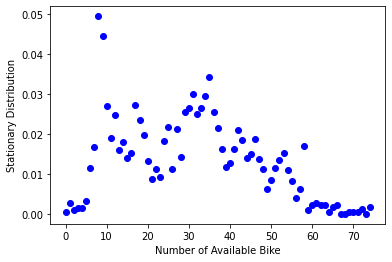

In [ ]:
init_state = [0] * 75 # [0, 0, 0, ... , 0]
init_state[0] = 1 # [1, 0, 0, ... , 0]

# set transition matrix
transition_matrix =  np.array(west_six_tm)

# set initial distribution
initial_dist = np.array(init_state)

# simulate 5000 time steps
for _ in range(5000):
    update = initial_dist @ transition_matrix
    initial_dist = update
    
print(initial_dist)

x_axis = list(range(0,75))
plt.plot(x_axis, initial_dist, 'bo')
plt.xlabel('Number of Available Bike')
plt.ylabel('Stationary Distribution')

In the morning at W 21 St & 6 Ave's CitiBike station, as it is one of the most popular stations in New York City, there are a lot of movements both incoming and outgoing bikes. The relatively higher stationary distribution points between 8 (a refresh point) and 50 displays such behavior that there are active incoming and outgoing bikes at this station. If we were to narrow down the time period perhaps from 7:00AM to 8:30AM, we would not have closely no data points near the end points of the stationary distribution. Around the end of the morning, we expect there are approximately 35 bikes at this station.

In [ ]:
def transition_matrix(transitions):
    n = 1 + max(transitions) # number of states
    M = [[0] * n for _ in range(n)]

    for (i,j) in zip(transitions,transitions[1:]):
        M[i][j] += 1

    # now convert to probabilities:
    for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]
    return M

In [ ]:
west_six_e_tm = transition_matrix(s2_e_states)
for row in west_six_e_tm: print(' '.join('{0:.4f}'.format(x) for x in row))

0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000

[0.00048532 0.         0.00048532 0.00048532 0.00194126 0.00291189
 0.00242658 0.00048532 0.00436784 0.00097063 0.00145595 0.00145595
 0.00339721 0.00097063 0.00291189 0.00436784 0.00339721 0.00242658
 0.00291189 0.0063091  0.00291189 0.00485316 0.00582379 0.00679442
 0.00533847 0.00485316 0.0063091  0.00679442 0.01261821 0.01747136
 0.01989794 0.01747135 0.02620708 0.02814832 0.02717759 0.02911897
 0.02523686 0.0262076  0.02183845 0.02475024 0.01601377 0.02378729
 0.02474627 0.03249655 0.0194085  0.02864862 0.038324   0.02763792
 0.03686133 0.03102454 0.04180461 0.04341913 0.03946967 0.04393002
 0.04226102 0.03498649 0.02350518 0.01740043 0.0085296  0.00609365
 0.0095795  0.00638044 0.00373613 0.00712776 0.00417908 0.0071005
 0.00543304 0.0029289  0.00292686 0.00209104 0.00167246 0.00083663
 0.00083653 0.         0.00083643]


Text(0, 0.5, 'Stationary Distribution')

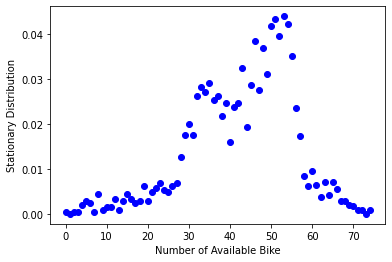

In [ ]:
init_state = [0] * 75 # [0, 0, 0, ... , 0]
init_state[0] = 1 # [1, 0, 0, ... , 0]

# set transition matrix
transition_matrix =  np.array(west_six_e_tm)

# set initial distribution
initial_dist = np.array(init_state)

# simulate 5000 time steps
for _ in range(5000):
    update = initial_dist @ transition_matrix
    initial_dist = update
    
print(initial_dist)

x_axis = list(range(0,75))
plt.plot(x_axis, initial_dist, 'bo')
plt.xlabel('Number of Available Bike')
plt.ylabel('Stationary Distribution')

In the evening at W 21 St & 6 Ave's CitiBike station, it demonstrates a closely similar behavior to that of West St and Chamber St. It is slightly different because the rebalancing counter resets the capacity to a lower number. Around the end of the evening, we expect there are approximately 45 to 55 bikes at this station.

In [ ]:
# Broadway & W 58 St's total capacity: 76 docks
# Morning / Broadway & W 58 St
list_a = s3_start["count"].to_list()
list_b = s3_end["count"].to_list()
list_b.extend(12 * [0]) # # filling the gap for missing data points at the end

s3_states = []
num_bikes, count = 0, 0
capacity = 53
for i in range(len(list_a)):
  num_bikes = int(capacity - list_a[i] + list_b[i])
  s3_states.append(num_bikes)
  capacity = num_bikes
  count += 1
  if count % 900 == 0:
    capacity = 57
    
# Evening / Broadway & W 58 St 
list_c = s3_start_e["count"].to_list()
list_d = s3_end_e["count"].to_list()
list_d.extend(8 * [0]) # filling the gap for missing data points at the end

s3_e_states = []
num_bikes, count = 0, 0
capacity = 53
for i in range(len(list_c)):
  num_bikes = int(capacity - list_c[i] + list_d[i])
  s3_e_states.append(num_bikes)
  capacity = num_bikes
  count += 1
  if count % 116 == 0:
    capacity = 60


In [ ]:
def transition_matrix(transitions):
    n = 1 + max(transitions) # number of states
    M = [[0] * n for _ in range(n)]

    for (i,j) in zip(transitions,transitions[1:]):
        M[i][j] += 1

    # now convert to probabilities:
    for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]
    return M

In [ ]:
broadway_tm = transition_matrix(s3_states)
for row in broadway_tm: print(' '.join('{0:.4f}'.format(x) for x in row))

0.5000 0.5000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
0.1250 0.5000 0.2500 0.1250 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000

[0.00098851 0.00395403 0.0074138  0.01235634 0.00593104 0.00642529
 0.02174715 0.0212529  0.01680462 0.02520693 0.0212529  0.01334484
 0.01631036 0.01878163 0.03163222 0.02471267 0.0212529  0.02273566
 0.01977014 0.01285059 0.01729887 0.0222414  0.02273566 0.01581611
 0.01334484 0.01334484 0.01581611 0.0212529  0.01631036 0.01680462
 0.00889656 0.01927588 0.02965521 0.02471208 0.02421737 0.02965252
 0.02175191 0.01680346 0.01481919 0.01282281 0.01088304 0.01187418
 0.01029531 0.01907169 0.01523411 0.00994521 0.00846121 0.00642271
 0.00411085 0.00153906 0.00158137 0.00334159 0.00548016 0.00523128
 0.00726578 0.01656271 0.01139476 0.01344167 0.01483281 0.01220166
 0.01220564 0.01176825 0.00828148 0.01002489 0.00740969 0.00915315
 0.00958901 0.00653796 0.00523037 0.00697383 0.00871728 0.00348691
 0.00435864 0.00174346 0.00217932 0.00043586 0.00043586]


Text(0, 0.5, 'Stationary Distribution')

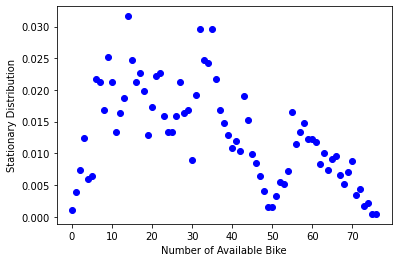

In [ ]:
init_state = [0] * 77 # [0, 0, 0, ... , 0]
init_state[0] = 1 # [1, 0, 0, ... , 0]

# set transition matrix
transition_matrix =  np.array(broadway_tm)

# set initial distribution
initial_dist = np.array(init_state)

# simulate 5000 time steps
for _ in range(5000):
    update = initial_dist @ transition_matrix
    initial_dist = update
    
print(initial_dist)

x_axis = list(range(0,77))
plt.plot(x_axis, initial_dist, 'bo')
plt.xlabel('Number of Available Bike')
plt.ylabel('Stationary Distribution')

In the morning at Broadway & W 58 St's CitiBike station, there are more bikes start from the station than the bikes arriving at that station to end their trips. This matches our expectation of the CitiBikes being heavily utilized during rush hour in the morning, leaving fewer bikes at the station than its full capacity. Around the end of the morning, we expect there are approximately 20 to 30 bikes at this station.

In [ ]:
def transition_matrix(transitions):
    n = 1 + max(transitions) # number of states
    M = [[0] * n for _ in range(n)]

    for (i,j) in zip(transitions,transitions[1:]):
        M[i][j] += 1

    # now convert to probabilities:
    for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]
    return M

In [ ]:
broadway_e_tm = transition_matrix(s3_e_states)
for row in broadway_e_tm: print(' '.join('{0:.4f}'.format(x) for x in row))

0.5000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.5000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000

[0.00093303 0.         0.00046651 0.00046651 0.         0.
 0.         0.         0.         0.00046651 0.         0.
 0.         0.         0.00093303 0.00419863 0.00513166 0.00279909
 0.00233257 0.0032656  0.00186606 0.00233257 0.00233257 0.
 0.00746423 0.01352892 0.00746423 0.00606468 0.00186606 0.00093303
 0.00093303 0.00186607 0.00139955 0.00186604 0.00979699 0.01306271
 0.01073011 0.01026345 0.01072997 0.00606501 0.00839654 0.00606458
 0.00279947 0.0018673  0.0051307  0.02190664 0.01957637 0.02611662
 0.02986899 0.04993682 0.0468016  0.03234288 0.03207984 0.03430445
 0.0326342  0.04937062 0.05883661 0.05366111 0.07041607 0.05500813
 0.06973887 0.04740743 0.0363183  0.03339804 0.01355762 0.01257057
 0.0062593  0.00531083 0.00241583 0.         0.0004828  0.
 0.         0.         0.00144841 0.0009656  0.00144841]


Text(0, 0.5, 'Stationary Distribution')

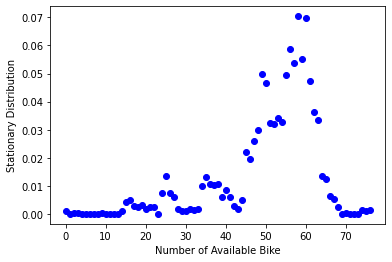

In [ ]:
init_state = [0] * 77 # [0, 0, 0, ... , 0]
init_state[0] = 1 # [1, 0, 0, ... , 0]

# set transition matrix
transition_matrix =  np.array(broadway_e_tm)

# set initial distribution
initial_dist = np.array(init_state)

# simulate 5000 time steps
for _ in range(5000):
    update = initial_dist @ transition_matrix
    initial_dist = update
    
print(initial_dist)

x_axis = list(range(0,77))
plt.plot(x_axis, initial_dist, 'bo')
plt.xlabel('Number of Available Bike')
plt.ylabel('Stationary Distribution')

In the evening at Broadway & W 58 St's CitiBike station, the plot shows a similar behavior in terms of a number of available bikes at the station. Seeing that the both tails of stationary distribution are closely 0, we expect that there are as many incoming bikes as outgoing bikes at this time period at Broadway & W 58 St's CitiBike station. Around the end of the evening, we expect there are approximately 55 to 65 bikes at this station.

# Insight

Through this project, we have worked with New York City CitiBike data, which contains Citibike rides in NYC that happened in July 2022. With the lessons learned in the classroom, we have challenged ourselves to estimate the steady-state of the number of available bikes in a CitiBike station using Markov chains for three popular stations of our choice.

Exploring three stations in two different blocks of time (i.e. morning from 5AM to 10AM and evening from 5PM to 10PM), we observed similar results across all three stations. This outcome was likely expected because these popular stations have a lot of movements ("started_at" and "ended_at").
Without the counter to "reset" the capacity to a certain number, these stations experienced an excess supply of CitiBikes at certain period of time for each block of time. After setting the counter to rebalance, we were able to obtain the result that is closer to our expectation than the result without the rebalancing algorithm. This aligns with today's CitiBike efforts to deliver the bikes (e.g. Bike Angels, valets, bike trains, etc.) to locations with the most demand through CitiBike team members and operational staffs. As many CitiBike riders ride from upper Manhattan to lower Manhattan, CitiBike must deliver more sophisticated algorithms to fight against both the shortage and the excess of CitiBikes at each locations through analyzing the data of each CitiBike station.